## Importing Libraries


In [1]:
import tensorflow as tf                #used for machine learning tasks
import matplotlib.pyplot as plt        # this and seaborn used for data visualization
import pandas as pd                    #useful for data manipulation or analysis
import seaborn as sns
import numpy as np
import cv2
print("Well done")
print("Got Started")

Well done
Got Started


## Data Preprocessing

In [2]:
#keras is part of tensorflow
training_set=tf.keras.utils.image_dataset_from_directory(
    "train",
    labels="inferred",  #whatever is the name select it 
    label_mode="categorical",   #it is multiclass problem
    class_names=None,  #since i have used inferred so whatever will be the name of diectory it will take that 
    color_mode="rgb",
    batch_size=32,       #if i want to speed i can change it to 64 or 128
    image_size=(128, 128),
    shuffle=True,      #to reduce the biasness of the model
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [3]:
validation_set=tf.keras.utils.image_dataset_from_directory(
    "valid",
    labels="inferred",  #whatever is the name select it 
    label_mode="categorical",   #it is multiclass problem
    class_names=None,  #since i have used inferred so whatever will be the name of diectory it will take that 
    color_mode="rgb",
    batch_size=32,       #if i want to speed i can change it to 64 or 128
    image_size=(128, 128),
    shuffle=True,      #to reduce the biasness of the model
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    
)

Found 17572 files belonging to 38 classes.


In [4]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [5]:
# x is training example and y is label
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  ...

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     

Convulational Neural Network is used in image related problems and time series analysis  or text classification problem.
CNN is part of deep learning and is used to deal with image dataset and also to train our model so that model can get ability to classify images.


## Building Model


In [6]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Input,Dropout
from tensorflow.keras.models import Sequential

In [7]:
model=Sequential()

#### Building Convulation Layer

In [8]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

D:\JN\tfvenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [10]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Dropout(0.25))  ##To avoid overfitting

In [14]:
model.add(Flatten())

In [15]:
model.add(Dense(units=1500,activation='relu'))

In [16]:
model.add(Dropout(0.4))   ##To avoid overfitting

#### Output Layer

In [17]:
model.add(Dense(units=38,activation='softmax'))

### Compiling Model

In [18]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

### Model Training

In [20]:
training_history=model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3323s 2s/step - accuracy: 0.3969 - loss: 2.1426 - val_accuracy: 0.8265 - val_loss: 0.5440
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3520s 2s/step - accuracy: 0.8333 - loss: 0.5346 - val_accuracy: 0.8972 - val_loss: 0.3248
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 5322s 2s/step - accuracy: 0.9034 - loss: 0.3008 - val_accuracy: 0.9136 - val_loss: 0.2642
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 12371s 6s/step - accuracy: 0.9337 - loss: 0.2033 - val_accuracy: 0.9334 - val_loss: 0.2055
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 6091s 3s/step - accuracy: 0.9493 - loss: 0.1571 - val_accuracy: 0.9504 - val_loss: 0.1510
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4886s 2s/step - accuracy: 0.9630 - loss: 0.1142 - val_accuracy: 0.9553 - val_loss: 0.1455
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 14519s 7s/step - accuracy: 0.9698 - loss: 0.0921 - val_accuracy: 0.9590 - val_loss: 0.1316
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4334s 2s/step - accuracy: 0.9754

## Model Evaluation

In [21]:
#Model Evaluation on training set
train_loss,train_acc=model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1053s 479ms/step - accuracy: 0.9878 - loss: 0.0381


In [22]:
print(train_loss,train_acc)

0.035032156854867935 0.9890177249908447


In [23]:
#Model Evaluation on training set
val_loss,val_acc=model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 296s 539ms/step - accuracy: 0.9615 - loss: 0.1436


In [24]:
print(val_loss,val_acc)

0.13010834157466888 0.9634076952934265


### Saving Model

In [25]:
model.save("trained_model.keras")

In [26]:
import tensorflow as tf
print(tf.__version__)


2.18.0


In [27]:
training_history.history  #all the 10 epochs values

{'accuracy': [0.5959883332252502,
  0.855195939540863,
  0.9111031889915466,
  0.9389430284500122,
  0.9533395171165466,
  0.9649335145950317,
  0.9707944989204407,
  0.9749057292938232,
  0.9791592359542847,
  0.9807098507881165],
 'loss': [1.368219256401062,
  0.45641642808914185,
  0.2752011716365814,
  0.1869426965713501,
  0.14351999759674072,
  0.10729391872882843,
  0.089325450360775,
  0.0765383392572403,
  0.0642046183347702,
  0.05792560800909996],
 'val_accuracy': [0.8265421986579895,
  0.8972228765487671,
  0.9135556817054749,
  0.9333598613739014,
  0.9504324793815613,
  0.9553266763687134,
  0.9590257406234741,
  0.9357500672340393,
  0.9700090885162354,
  0.9634076952934265],
 'val_loss': [0.5440027117729187,
  0.3247833549976349,
  0.264201283454895,
  0.2054693102836609,
  0.15100553631782532,
  0.14548534154891968,
  0.1316203474998474,
  0.21943025290966034,
  0.09949304908514023,
  0.13010835647583008]}

In [28]:
# Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

### Accuracy Visualization

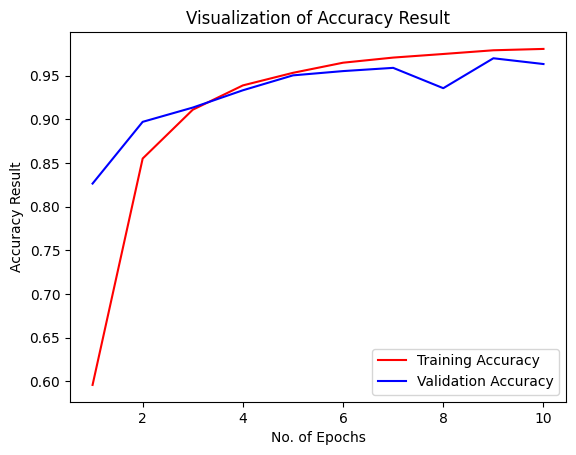

In [29]:
epochs=[i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

### Some other metrics for model evaluation

In [30]:
class_namess=['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']
print(class_namess)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [31]:
test_set=tf.keras.utils.image_dataset_from_directory(
    "valid",
    labels="inferred",  #whatever is the name select it 
    label_mode="categorical",   #it is multiclass problem
    class_names=None,  #since i have used inferred so whatever will be the name of diectory it will take that 
    color_mode="rgb",
    batch_size=32,       #if i want to speed i can change it to 64 or 128
    image_size=(128, 128),
    shuffle=False,      #entire thing will be passed sequentially
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    
)

Found 17572 files belonging to 38 classes.


In [32]:
y_pred=model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 281s 510ms/step


(array([[9.99999762e-01, 7.97456459e-12, 4.08876112e-13, ...,
         8.41537490e-18, 2.24839840e-16, 3.69994659e-16],
        [9.95848656e-01, 6.07836614e-10, 8.63165428e-10, ...,
         7.48982647e-12, 1.56913848e-12, 6.50913568e-12],
        [1.00000000e+00, 1.44674713e-12, 8.44181170e-13, ...,
         3.07671276e-18, 3.77187186e-16, 1.20806782e-15],
        ...,
        [1.89930696e-10, 2.92915323e-13, 1.02908935e-08, ...,
         1.00560990e-10, 2.16248981e-12, 9.99999404e-01],
        [1.26370381e-11, 9.04579942e-16, 1.40479850e-10, ...,
         7.43194048e-11, 1.55873334e-13, 9.99999881e-01],
        [3.69605394e-16, 4.80184301e-16, 7.87329036e-16, ...,
         4.97576641e-16, 7.11518897e-13, 1.00000000e+00]], dtype=float32),
 (17572, 38))

In [41]:
predicated_categaries=tf.argmax(y_pred,axis=1)  
#it will go inside y_pred and get maximum value and will return the index of that max value and axis=1 is return the index in coulmn wise fashion

In [42]:
predicated_categaries

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [43]:
true_categories=tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [44]:
Y_true=tf.argmax(true_categories,axis=1)  
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [45]:
from sklearn.metrics import classification_report,confusion_matrix

In [46]:
print(classification_report(Y_true,predicated_categaries,target_names=class_namess))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.95      0.96      0.96       504
                                 Apple___Black_rot       0.97      0.99      0.98       497
                          Apple___Cedar_apple_rust       0.99      0.94      0.96       440
                                   Apple___healthy       0.90      0.98      0.94       502
                               Blueberry___healthy       0.96      0.96      0.96       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.99      0.99       421
                 Cherry_(including_sour)___healthy       0.98      1.00      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.96      0.91      0.94       410
                       Corn_(maize)___Common_rust_       0.98      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.96      0.95      0.

In [47]:
cm=confusion_matrix(Y_true,predicated_categaries)
cm
cm.shape

(38, 38)

### Confusion Matrix Visualization

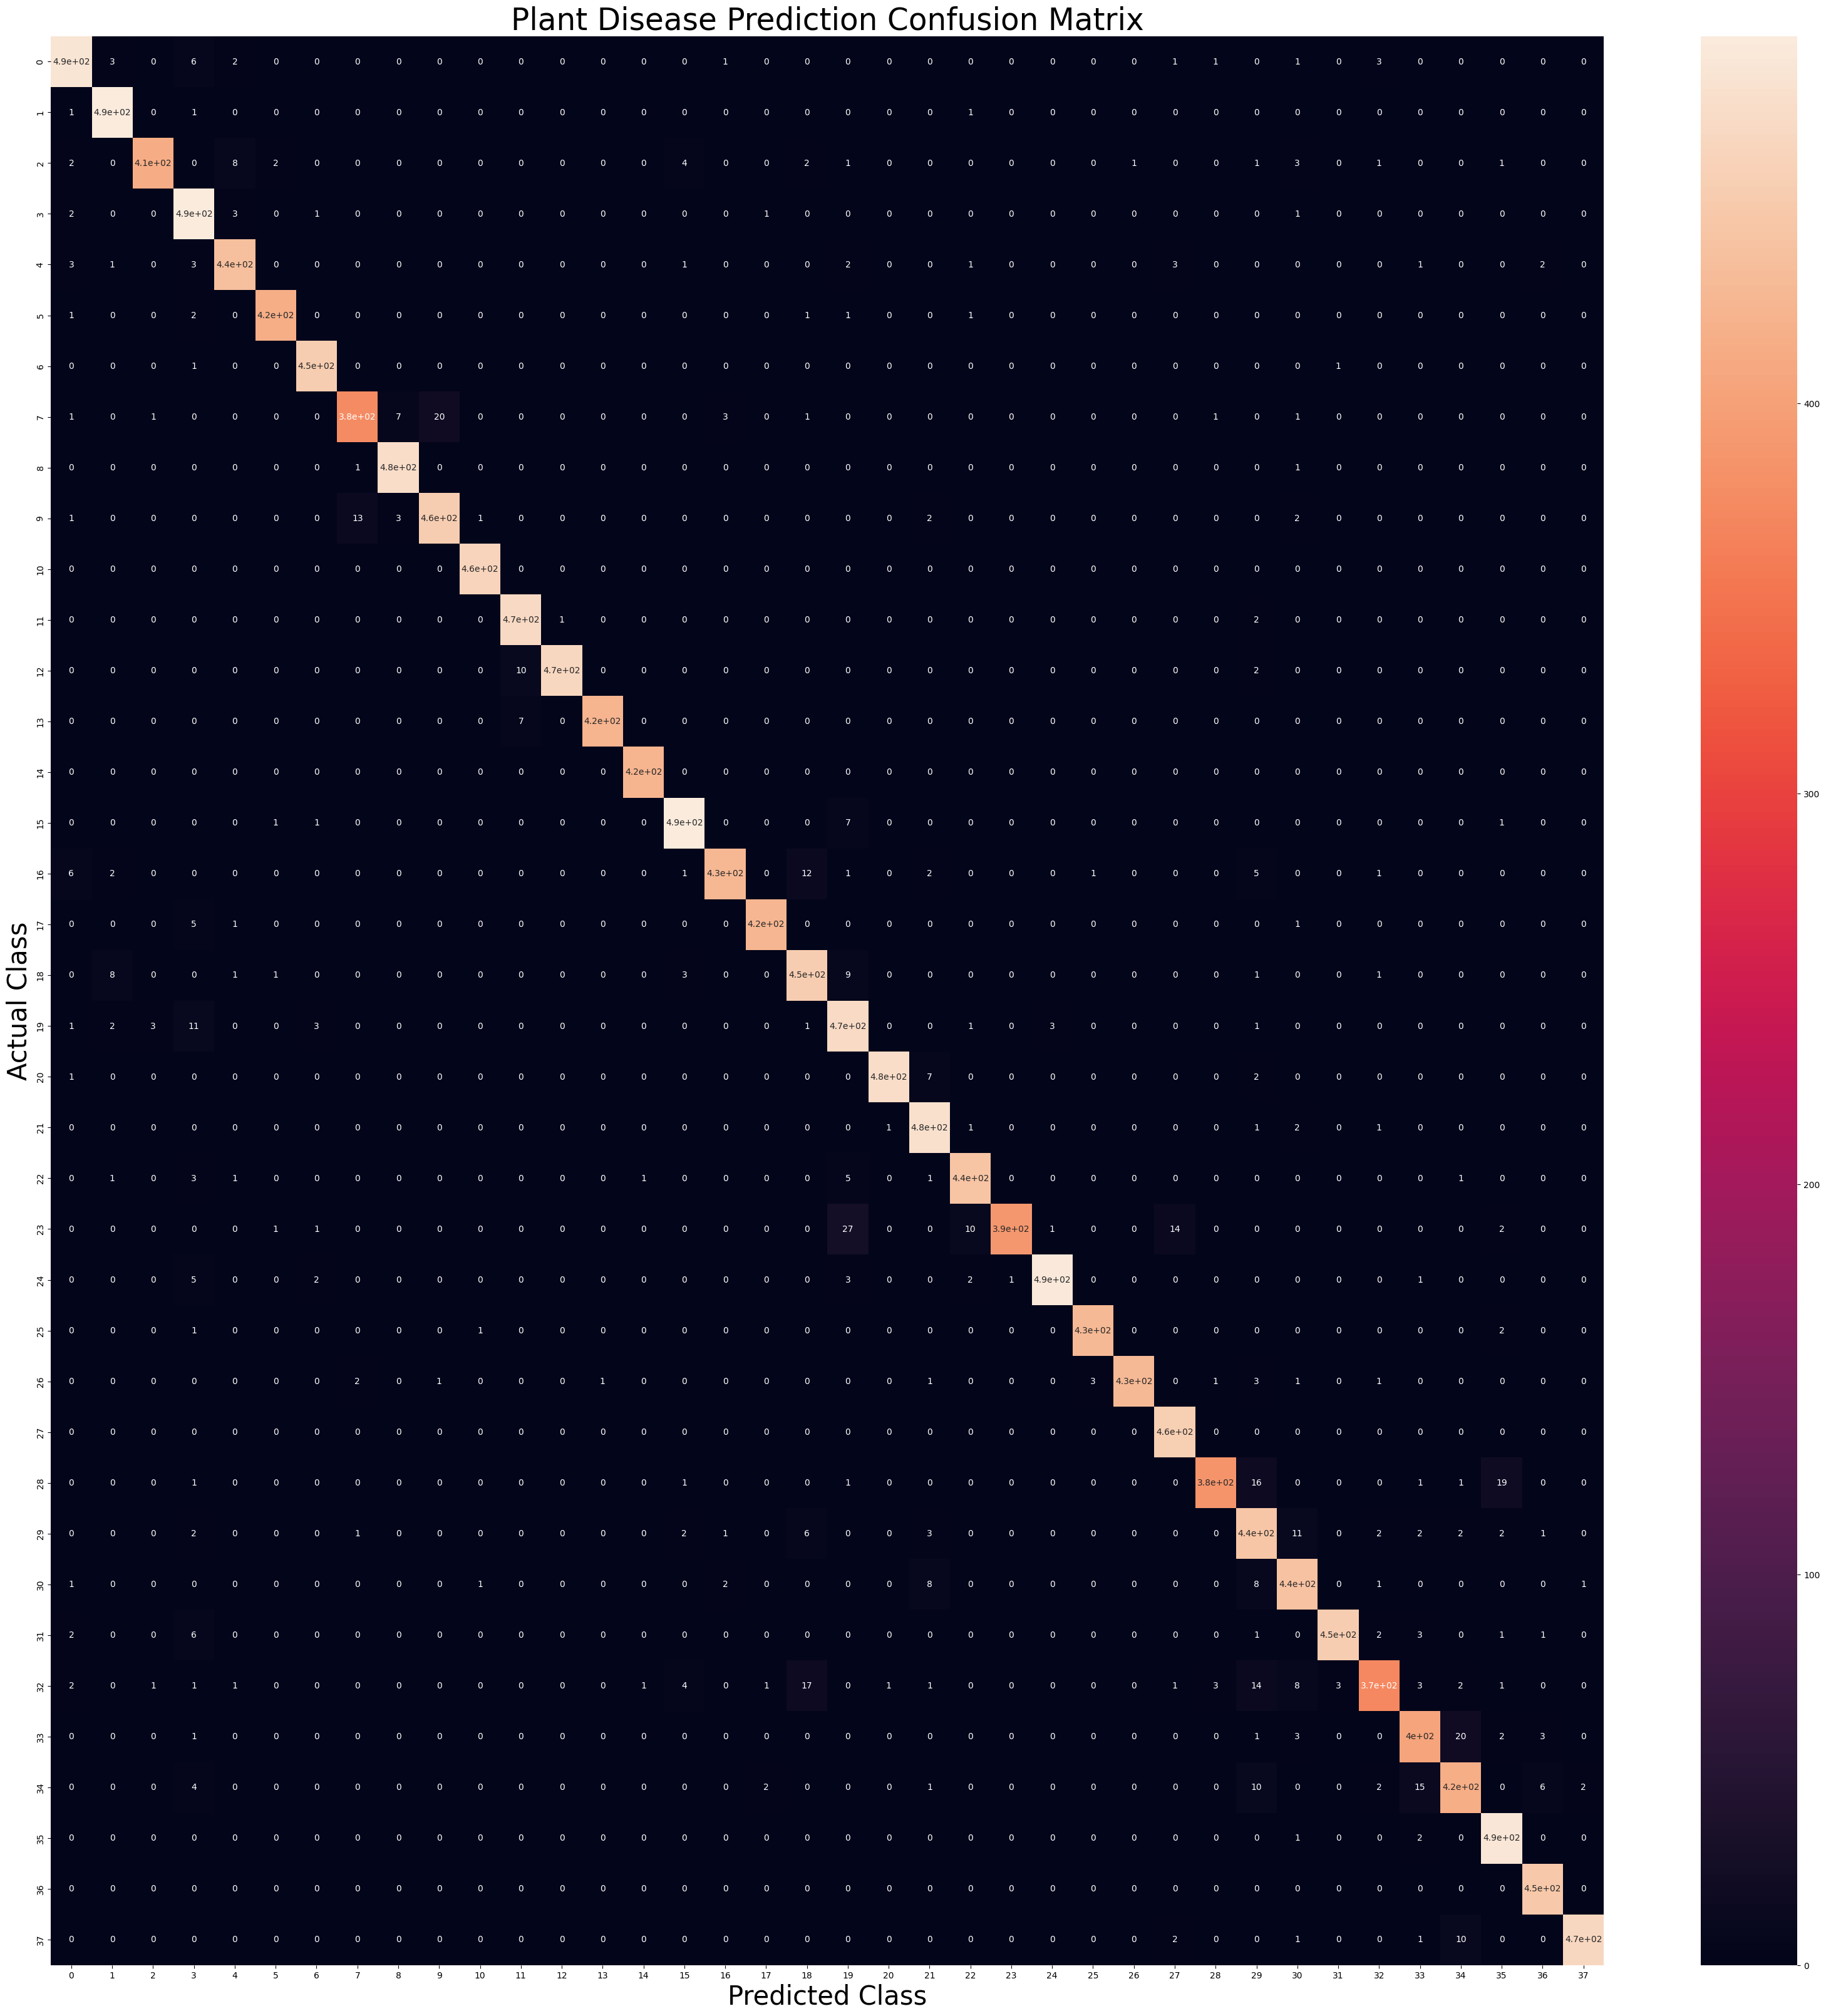

In [48]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=30)
plt.ylabel("Actual Class",fontsize=30)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=35)
plt.show()